In [1]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/PSOSM

/content/drive/MyDrive/PSOSM


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as gone
from textblob import TextBlob
from sklearn.ensemble import RandomForestRegressor
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import nltk
import pickle
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Q1 
file = pd.read_csv("IdentityResolution.csv")

file_nump =  file.to_numpy()
user = []
twit_user = []
face_user = []
insta_user = []
for i in file_nump:
  user.append(i[0])
  l = i[1].split("/")
  if(l[-1]!=""):
    twit_user.append(l[-1])
  else:
    twit_user.append(l[-2])
  m = i[2].split("/")
  if(m[-1]!=""):
    face_user.append(m[-1])
  else:
    face_user.append(m[-2])
  k = i[3].split("/")
  if(k[-1]!=""):
    insta_user.append(k[-1])
  else:
    insta_user.append(k[-2])


In [5]:
print(user)
# for i in insta_user:
#   print(i)
print(twit_user)
print(face_user)
print(insta_user)

['Alex Sablan', 'Xavier Gass', 'Nicole Lapin', 'Mattan Griffel', 'Shashank Bharadwaj', 'HerArt SheLoves', 'Jon Mitchell', 'Adn Montalvo Estrada', 'Cristyan J. Moreno', 'Danny Ngan', 'Heidi Schnenberg-Hausdorf', 'Enrique Burgos', 'Scott Ladewig', 'Shashank saxena', 'Tim Brauhn', 'Mae Hacking', 'Shashank Mathur', 'Rachel Keslensky', 'Rich Kirkpatrick', 'Kyle Seth Gray', 'Reza Prabowo', 'ssalazars', 'Anika Guldstrand', 'Mauricio Castrillo Urea', 'Ryan Blais', 'Kim van Amersfoort', 'Jan-Hendrik Senf', 'Ryan Sharp', 'hatem zidi', 'Alex Odam', 'Jordan Earles', 'Makoy Peneyra', 'Chris Blais/Nordmach', 'Rob Blaich', 'Eric Zimmett', 'Santiago Cesini', 'Victor Hernandez', 'Sophia Tran', 'Robert A Bernard Jr', 'Michael Kunz', 'Spyridon Kagkas', 'Michaelangelo Ilagan', 'Jeffrey Kalmikoff', 'dena rochelle smolek', 'Darren Smith', 'Jamie   A. MacDonald', 'Nicolas Copano', 'Martin Harauer', 'Mark Ryan', 'Karen Michaels', 'Jhoon Saravia', 'Silvia Rossi', 'Nikki Gordon-Bloomfield', 'Josh Felser', 'Chuc

In [6]:
import nltk
mdtf = []
mdti = []
mdfi = []
fdtf = []
fdti = []
fdfi = []
for i in range(len(user)):
  mdtf.append(nltk.masi_distance(set(twit_user[i]),set(face_user[i])))
  mdti.append(nltk.masi_distance(set(twit_user[i]),set(insta_user[i])))
  mdfi.append(nltk.masi_distance(set(face_user[i]),set(insta_user[i])))
  fdtf.append(nltk.jaccard_distance(set(twit_user[i]),set(face_user[i])))
  fdti.append(nltk.jaccard_distance(set(twit_user[i]),set(insta_user[i])))
  fdfi.append(nltk.jaccard_distance(set(face_user[i]),set(insta_user[i])))
print(mdtf)
print(mdti)
print(mdfi)
print(fdtf)
print(fdti)
print(fdfi)

[0.0825, 0.22000000000000003, 0.13399999999999998, 0.0, 0.28875, 0.0, 0.2911764705882353, 0.0, 0.22000000000000003, 0.29333333333333333, 0.14888888888888888, 0.0825, 0.0825, 0.09900000000000002, 0.06699999999999999, 0.0, 0.0825, 0.2030769230769231, 0.28600000000000003, 0.0, 0.18272727272727274, 0.0, 0.20625000000000002, 0.0, 0.1675, 0.17600000000000002, 0.0, 0.0, 0.24000000000000002, 0.09571428571428575, 0.06699999999999999, 0.2592857142857143, 0.0, 0.25235294117647056, 0.08375, 0.0, 0.17600000000000002, 0.17600000000000002, 0.0, 0.12000000000000001, 0.0, 0.0, 0.11166666666666665, 0.2030769230769231, 0.2828571428571429, 0.050769230769230775, 0.2475, 0.22687500000000002, 0.0, 0.12692307692307692, 0.29333333333333333, 0.09900000000000002, 0.20625000000000002, 0.22846153846153847, 0.0, 0.24000000000000002, 0.08375, 0.25384615384615383, 0.0, 0.0, 0.28875, 0.07444444444444448, 0.06699999999999999, 0.2030769230769231, 0.5304166666666666, 0.23571428571428574, 0.2605263157894737, 0.0, 0.110000

In [7]:
countmdtf = 0
countmdti = 0
countmdfi = 0
countfdtf = 0
countfdti = 0
countfdfi = 0
for i in range(len(user)):
  if(mdtf[i]<fdtf[i]):
    countmdtf = countmdtf+1
  else:
    countfdtf = countfdtf+1
  if(mdti[i]<fdti[i]):
    countmdti = countmdti+1
  else:
    countfdti = countfdti+1
  if(mdfi[i]<fdfi[i]):
    countmdfi = countmdfi+1
  else:
    countfdfi = countfdfi+1
if(countmdtf>=countfdtf):
  print("masi for twitter-facebook")
else:
  print("jaccord for twitter-facebook")
if(countmdti>=countfdti):
  print("masi for twitter-instagram")
else:
  print("jaccord for twitter-instagram")
if(countmdfi>=countfdfi):
  print("masi for facebook-instagram")
else:
  print("jaccord for facebook-instagram")


masi for twitter-facebook
masi for twitter-instagram
masi for facebook-instagram


In [8]:
print(countmdtf,countfdtf)
print(countmdti,countfdti)
print(countmdfi,countfdfi)

232 91
165 158
218 105


In [9]:
frqmdtf = [0]*5
frqmdti = [0]*5
frqmdfi = [0]*5
frqfdtf = [0]*5
frqfdti = [0]*5
frqfdfi = [0]*5



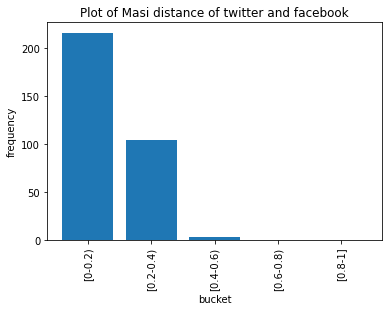

In [10]:
for i in mdtf:
  if(i<=0.2):
    frqmdtf[0] =  frqmdtf[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqmdtf[1] =  frqmdtf[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqmdtf[2] =  frqmdtf[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqmdtf[3] =  frqmdtf[3]  + 1
  else:
    frqmdtf[4] =  frqmdtf[4]  + 1


buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqmdtf)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Masi distance of twitter and facebook")
plt.xticks(rotation=90)
plt.show()

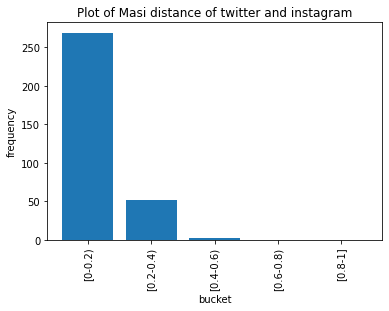

In [11]:
for i in mdti:
  if(i<=0.2):
    frqmdti[0] =  frqmdti[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqmdti[1] =  frqmdti[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqmdti[2] =  frqmdti[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqmdti[3] =  frqmdti[3]  + 1
  else:
    frqmdti[4] =  frqmdti[4]  + 1


buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqmdti)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Masi distance of twitter and instagram")
plt.xticks(rotation=90)
plt.show()

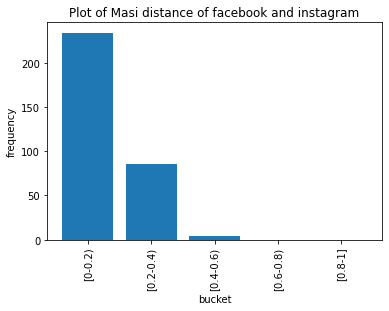

In [12]:
for i in mdfi:
  if(i<=0.2):
    frqmdfi[0] =  frqmdfi[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqmdfi[1] =  frqmdfi[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqmdfi[2] =  frqmdfi[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqmdfi[3] =  frqmdfi[3]  + 1
  else:
    frqmdfi[4] =  frqmdfi[4]  + 1

buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqmdfi)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Masi distance of facebook and instagram")
plt.xticks(rotation=90)
plt.show()

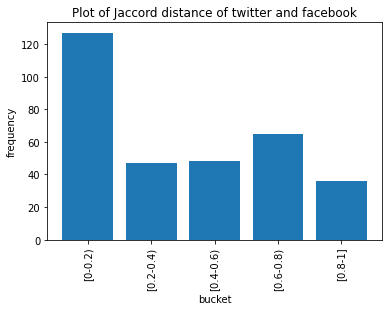

In [13]:
for i in fdtf:
  if(i<=0.2):
    frqfdtf[0] =  frqfdtf[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqfdtf[1] =  frqfdtf[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqfdtf[2] =  frqfdtf[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqfdtf[3] =  frqfdtf[3]  + 1
  else:
    frqfdtf[4] =  frqfdtf[4]  + 1


buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqfdtf)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Jaccord distance of twitter and facebook")
plt.xticks(rotation=90)
plt.show()

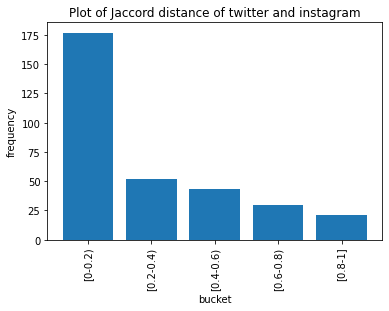

In [14]:
for i in fdti:
  if(i<=0.2):
    frqfdti[0] =  frqfdti[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqfdti[1] =  frqfdti[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqfdti[2] =  frqfdti[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqfdti[3] =  frqfdti[3]  + 1
  else:
    frqfdti[4] =  frqfdti[4]  + 1


buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqfdti)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Jaccord distance of twitter and instagram")
plt.xticks(rotation=90)
plt.show()

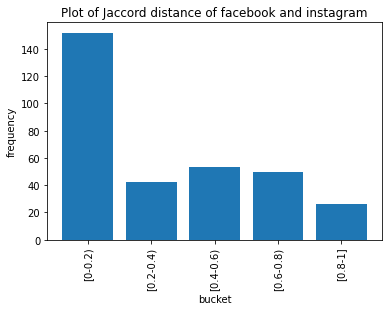

In [15]:
for i in fdfi:
  if(i<=0.2):
    frqfdfi[0] =  frqfdfi[0]  + 1
  elif(i>0.2 and i<=0.4):
    frqfdfi[1] =  frqfdfi[1]  + 1
  elif(i>0.4 and i<=0.6):
    frqfdfi[2] =  frqfdfi[2]  + 1
  elif(i>0.6 and i<=0.8):
    frqfdfi[3] =  frqfdfi[3]  + 1
  else:
    frqfdfi[4] =  frqfdfi[4]  + 1

buk=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]

plt.bar(buk,frqfdfi)
plt.xlabel("bucket")
plt.ylabel("frequency")
plt.title("Plot of Jaccord distance of facebook and instagram")
plt.xticks(rotation=90)
plt.show()